In [51]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
print(scipy.__file__)

D:\ANACONDA\lib\site-packages\scipy\__init__.py


In [47]:
# 1-2双盒模型无缓冲  dN1dt = − k12N1 + k21N2 + r ; dN2dt = k12N1 − k21N2 ; k12= 105/740 and k21= 102/900 ;
# according to the figure in appendix,we can obvirously see s is directly proportional to CO2 concentration, 
# so just choose one point to estimate the euqation between two values,r=10,CO2 concentration(ppm)=360,r=10/360*N1
r = pd.read_csv('global.1751_2014.csv', skiprows = [1], usecols = [0,1])
r = r.loc[(r['Year'] > 1986) & (r['Year'] < 2005)]
# .reset_index(drop=True, inplace=True)
# # Convert the values into ppm
r['CO2'] = r['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)']
r['PPM'] =r['CO2']/1000/2.13
r

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),CO2,PPM
236,1987,5725,5725,2.687793
237,1988,5936,5936,2.786854
238,1989,6066,6066,2.847887
239,1990,6074,6074,2.851643
240,1991,6142,6142,2.883568
241,1992,6078,6078,2.853521
242,1993,6070,6070,2.849765
243,1994,6174,6174,2.898592
244,1995,6305,6305,2.960094
245,1996,6448,6448,3.027230


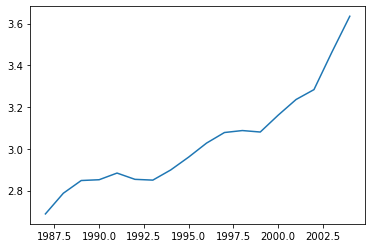

In [54]:
plt.plot(r['Year'],r['PPM'])

In [103]:
from scipy import integrate

# Define the function
def func(N,t,C):
    N1,N2=N
    k12,k21,R=C
    
    dNdt=[-1*k12N1 + k21N2 + r,
          k12N1 + -1*k21N2]
    
    return dNdt

    k12 = 105/740
    k21 = 102/900
    t = np.linspace(1987,2004,18)
    R = r.iloc[t-1987,3]
    
    # Initial condition
    N10 = 740/2.13
    N20 = 900/2.13

    # Solve ODE
    n = integrate.odeint(func, N0, t, args=(k12,k21,R))
    n

    n1 = n[2:,0]
    
    # Error
    g = lambda t:exp(-0.3*t)

    Plot results
    plt.plot(t,n1)
    plt.xlabel('time (t)')
    plt.ylabel('N1(t)')
    plt.show()

SyntaxError: invalid syntax (4200920273.py, line 31)

In [95]:
CO2a = pd.DateFrame{'Year':t,'CO2(ppm) in atmosphere':n1}
# CO2s = pd.DateFrame{'Year':t,'CO2(ppm) in atmosphere':n2}
CO2a
# CO2s

SyntaxError: invalid syntax (1210952575.py, line 1)

In [1]:
conda install nbconvert

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
sudo apt-get install pandoc

SyntaxError: invalid syntax (1901338604.py, line 1)